<a href="https://colab.research.google.com/github/yashkaushik02/MLPractice/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Import Dataset

In [3]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

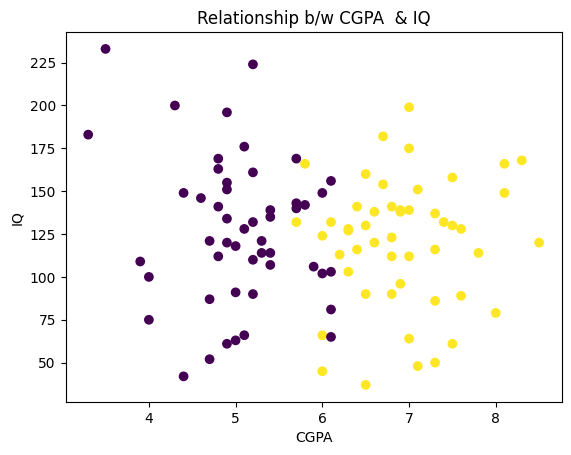

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c = df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Relationship b/w CGPA  & IQ')
plt.show()

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
print(X_train, y_train, X_test, y_test)

    Unnamed: 0  cgpa
31          31   3.9
78          78   6.1
16          16   5.2
56          56   6.1
59          59   4.8
..         ...   ...
0            0   6.8
13          13   6.4
29          29   7.0
52          52   7.0
74          74   6.7

[90 rows x 2 columns] 31    0
78    0
16    0
56    0
59    0
     ..
0     1
13    1
29    1
52    1
74    1
Name: placement, Length: 90, dtype: int64     Unnamed: 0  cgpa
86          86   5.1
17          17   3.3
47          47   5.2
3            3   7.4
8            8   6.1
1            1   5.9
20          20   6.6
87          87   5.7
24          24   4.7
9            9   5.1 86    0
17    0
47    0
3     1
8     0
1     0
20    1
87    1
24    0
9     0
Name: placement, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
# to scale the values between -1 and 1

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.74176911, -1.89181141],
       [ 0.94697327,  0.04901066],
       [-1.28072945, -0.74496201],
       [ 0.15649811,  0.04901066],
       [ 0.26429018, -1.09783874],
       [-1.49631358, -0.03920853],
       [-0.63397705, -1.09783874],
       [ 1.01883465, -1.00961956],
       [-0.23873947, -0.03920853],
       [ 1.1625574 , -0.30386608],
       [ 0.47987431,  1.81339435],
       [ 0.44394362,  0.84298332],
       [ 0.87511189, -1.00961956],
       [-0.56211567, -0.30386608],
       [ 0.91104258,  1.10764088],
       [ 0.37208225, -0.03920853],
       [-0.41839291, -1.00961956],
       [-0.1309474 ,  0.49010658],
       [ 0.33615156,  1.10764088],
       [-0.34653153,  1.37229843],
       [ 0.73138914,  1.10764088],
       [-0.09501671, -0.56852364],
       [ 1.59372567, -1.45071548],
       [-0.20280878, -0.65674282],
       [-0.70583842,  0.84298332],
       [-0.31060084,  0.66654495],
       [ 0.69545845,  0.04901066],
       [-1.20886807, -1.80359222],
       [ 0.98290396,

In [14]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.23441878, -0.83318119],
       [-1.24479876, -2.42112652],
       [-0.16687809, -0.74496201],
       [-1.74782841,  1.19586006],
       [-1.56817496,  0.04901066],
       [-1.81968978, -0.12742771],
       [-1.13700669,  0.49010658],
       [ 1.27034947, -0.30386608],
       [-0.99328394, -1.18605793],
       [-1.53224427, -0.83318119]])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [18]:
y_test

86    0
17    0
47    0
3     1
8     0
1     0
20    1
87    1
24    0
9     0
Name: placement, dtype: int64

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.9

# Decision Regions in 2D

In [21]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

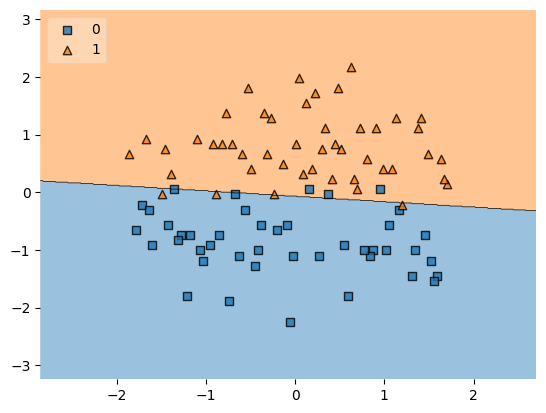

In [24]:
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

In [25]:
import pickle

In [27]:
pickle.dump(model,open("model.pkl","wb"))